# EXPLORATION 01_인공지능과 가위바위보 하기

## 이 노드에서 배운 것들

### 1. 딥러닝 기술은 이렇게 만든다

일반적으로 딥러닝 기술은 [데이터 준비] -> [딥러닝 네트워크 설계] -> [학습] -> [테스트(평가)] 의 순서로 만든다.


### 2. 시작하기 전에, 환경에 대해 알아봅시다

2-1. 텐서플로우
 - AI 공부를 시작하기 전에, 너무나 귀에 못이 박히도록 들어본 '텐서플로우'. 개발을 하던 입장이니 '아, 대충 머신러닝을 할 때 활용하는 라이브러리겠구나~ 하는 내용은 알았지만, 자세히는 몰랐는데 이번 기회에 사용해보게 되었다. 위키백과에서 말하기를, 텐서플로우는 _'다양한 작업에 대한 데이터 흐름 프로그래밍을 위한 오픈소스 SW 라이브러리'_ 라고 한다. 그리고 무려 구글에서 만들었다!
 저 정의로는 이해가 잘 안되어 추가적으로 찾아보니, 거의 대부분의 포스팅에서 '데이터를 그래프화 하여 수치연산을 하는 소프트웨어 라이브러리' 라고 하는 것을 찾아볼 수 있었다. 사용하다 보면 텐서플로우에 대해 좀 더 자세하게 알수있지 않을까?
 
2-2. 케라스 
 - 케라스 역시 AI를 시작하기 전 많은 곳에서 들어보았는데, _신경망 API이며 텐서플로우, CNTK, Theano와 함께 사용할 수 있다_ 라고 언급하고 있다. 음, 케라스는 텐서플로우 위에 '얹어' 사용하는 것이라고 들어본 적이 있는데, 아마 이 친구도 쓰다보면 더 잘 알게 될 것 같다. 
 케라스는 홈페이지 서두에 케라스의 '이념' 에 대해 언급하는데, _사용자 친화성, 모듈성, 쉬운 확장성, 파이썬과의 호환_ 등 '쓰기 편하다, 접근하기 편하다' 라는 점을 전반적으로 강조하고 있다. (개인적으로는 Unity가 생각나는 대목이다 ㅎㅎ 역시 마음의 고향이 Unity 이다 보니..<<)
 
2-3. MNIST 데이터베이스
 - MNIST 데이터베이스란?
 노드에서도 설명하고 있듯이, MNIST는 LeCun교수가 만든 실습용(?)데이터 세트로, 딥러닝계의 "Hello, world!" 같은 존재라고 한다. 여기서 정제된 손글씨 데이터를 가져와서, 학습시켜 분류해 볼 것이다.
 
### 3. 가위바위보를 만들기 전에, '손글씨 분류하기' 데이터셋을 통해 실습해보기

#### 3-1. 데이터 준비
    * MNIST 데이터셋을 불러오기

In [5]:
# 텐서플로우와 텐서플로우 안의 keras 라이브러리 불러오기
import tensorflow as tf
from tensorflow import keras

# numpy와 matplotlib 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt

# mnist 데이터 불러오기
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 각각의 데이터셋 길이 확인해보기(제대로 들어갔는지 확인)
print(len(x_train), len(y_train), len(x_test), len(y_test))

60000 60000 10000 10000


: 위의 mnist 데이터셋에서 설명하는대로, Train 데이터와 test 데이터는 각각 60,000개 10,000개 임을 확인할 수 있다.

    * 이미지 데이터를 출력해보기
    - x_train[1]과 y_train[1]에는 무엇이 들어있을까?

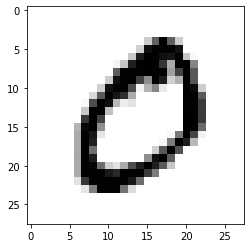

In [3]:
# 이미지를 출력하는 plt
# plt.imshow(출력할 이미지, 바이너리로(컬러가 아님))
plt.imshow(x_train[1], cmap=plt.cm.binary)
plt.show()

In [4]:
print(y_train[1])

0


x_train에는 분류할 손글씨 이미지가, y_train에는 손글씨의 라벨이 들어있음을 확인할 수 있다. (확인하기 위해 4개만 더 출력해보자!)

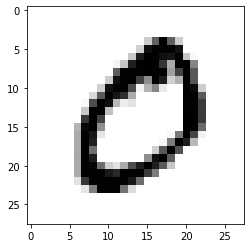

0


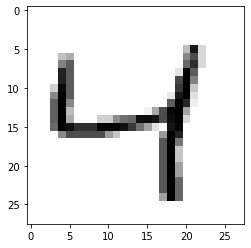

4


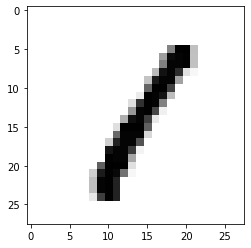

1


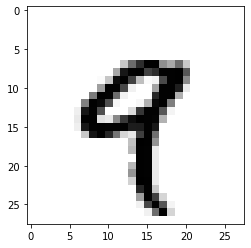

9


In [7]:
index = 1;
while index <= 4:
    plt.imshow(x_train[index], cmap=plt.cm.binary)
    plt.show()
    print(y_train[index])
    index = index+1

이와 같이, 불러온 MNIST 데이터셋의 (x_train, y_train) 쌍에는 (분류할 이미지, 분류된 숫자 라벨(정답지))가 있음을 알 수 있다.

In [10]:
#궁금하니까 x_test와 y_test에는 무엇이 들어있는지 확인해보자
print("x_test : " ,x_test[0])
print("y_test : ", y_test[0])

x_test :  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 

#### 3-2. 검증이란 무엇일까?
##### 1. 근데, 왜 train 데이터와 test 데이터가 필요할까?
   - 검증용 데이터는 모델의 훈련 방식이 잘 진행되고 있는지 확인하기 위해 필요하다. 만약 검증용 데이터 없이 학습용 데이터만 돌리고 모델을 서비스하게 된다면, 이 모델을 얼마나 믿을 수 있는지, 훈련이 잘 된 모델인지 아무도 알 수 없을 것이다!         
   (그리고 밀려들어올 소비자들의 항의와  떨어지는 신뢰도...) 이걸 생각하면, 검증용 데이터가 꼭 필요하다.
   
##### 2.과적합(Overfitting)과 교차검증
    그리고, 검증을 진행할 때도 유의해야 할 점이 있다.
    바로 '과적합(overfitting)'문제가 발생할 수 있다는 것!
    과적합은 모델이 검증 세트에 지나치게 익숙해져서, 실제로 전혀 모르는 test set이 주어졌을 때 성능이 떨어지는 문제를 말한다.
    마치 익숙한 수능 모의고사 문제만 여러번 풀고 '등급 잘 나온다~' 하고 방심했다가, 사설 모의고사를 쳤을 때 점수가 폭락하는... 그런...
    
    따라서 우리는 과적합이 발생하지 않게끔, 교차검증을 수행해야 한다.
    교차 검증은 검증 데이터가 고정되지 않게 조치하여, 편파적으로 학습되지 않게끔 활용하는 것이다.
    
##### 3. 교차검증의 종류
    이런 검증에도 다양한 종류가 있는데, 종류를 한 번 알아보자!
    1. 홀드아웃 방법
    2. k-fold cross validation
    3. Leave-p-out cross validation
    4. Leave-one-out cross validation
    5. Stratified k-fold cross validation
    
[이 종류는 해당 블로그 포스트에서 참고하였음](https://m.blog.naver.com/ckdgus1433/221599517834)

#### 3-3. 전처리하기

그럼, 데이터를 준비하고, 데이터가 들어간 것도 확인하였으니 이 데이터를 전처리하여 가공하기 쉽도록 만들어준다.
손글씨 이미지는 0 ~ 255 사이의 값을 가지므로, 이 값들이 0~1까지로 정리되게끔 나누어 적용하고   
이를 새로운 변수인 x_train_norm에 넣어준다.(nomarlized된 train변수)

In [6]:
x_train_norm, x_test_norm = x_train/255.0, x_test/255.0
print("트레인 데이터의 최솟값 : " , np.min(x_train_norm), "트레인 데이터의 최대값 : ", np.max(x_train_norm))

트레인 데이터의 최솟값 :  0.0 트레인 데이터의 최대값 :  1.0


### 자 이제 시작이야! 딥러닝 네트워크 설계하기

#### 3-4. 딥러닝 네트워크 설계하기
    * Squential API 를 활용하여 딥러닝 네트워크를 설계해보자.
    
    Q. Sequential API는 무엇인가?
    >> A. Sequential 모델은 각 레이어에 하나의 입력 텐서와 하나의 출력 텐서가 있는 일반 레이어 스택이 적합하다. 이와 반대로 Functional API가 있는데, 이는 순차적으로 나아가는 Sequential 모델보다 공유 레이어 및 다중 입력과 다중 출력을 꾸리는 경우에 적합하고, 비순차적으로 나아가는 방식이라고 한다.
    
   [출처:텐서플로우 가이드](https://www.tensorflow.org/guide/keras/sequential_model?hl=ko)

In [10]:
model = keras.models.Sequential()

#여기부터 7개의 레이어를 거쳐 결과를 내는 것을 확인할 수 있다.
#conv2D -> maxPool -> conv2D -> maxpooling2D -> Flatten -> Dense -> Dense
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32,(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('모델에 추가된 레이어 개수', len(model.layers))

모델에 추가된 레이어 개수 7


    * 각 레이어가 의미하는 것은 뭘까?
    - Sequential은 위에서 알아본 것처럼 '순차적으로' 지나가는 API이므로, 위의 7개의 레이어를 거치면서 일련의 예측 과정이 일어난다는 것을 알 수 있다.
    
   [Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/) :
   필터로 특징을 뽑아내는 컨볼루션 커널을 만들어준다. 처음 사용할 때는 input_shape=(사이즈, 사이즈, 채널) 이라는 인자로 인풋되는 이미지를 알려줘야 한다.
    
   [MaxPool2D](https://keras.io/api/layers/pooling_layers/max_pooling2d/) :
   윈도우를 움직여가며 최대값을 출력한다.(의미있는 정보만 남기고 나머지를 down하는 듯 하다!)
    
   [Flatten](https://keras.io/api/layers/reshaping_layers/flatten/) :
   위의 conv2d와 maxpool을 거친 레이어를 전결합층(아직 모름..)에 합치기 위해서 1차원의 형태로 변환해주는 함수라고 한다. 흐름 상 꼭 필요한 함수인 것 같다!
    
   [Dense](https://keras.io/api/layers/core_layers/dense/) :
   Dense를 거치면 output = activation((인풋+커널) + bias) 형태가 된다고 한다.
   커널은 가중치이고, bias도 적용되는 것을 보니 y = WX + b의 형태가 떠오른다 ㅎㅎ...
   아직 정확하게는 모르겠다.
    
   [참고할 포스팅](https://buomsoo-kim.github.io/keras/2018/05/02/Easy-deep-learning-with-Keras-8.md/)
   [참고 포스팅 2](https://tykimos.github.io/2017/01/27/CNN_Layer_Talk/)

    * 리셰이프 하기
    정규화한 train 데이터셋과 test 데이터셋을 1채널(흑백 바이너리이기 때문에)로 리셰이프 해준다.

In [8]:
print(format(x_train_norm.shape))

x_train_reshaped = x_train_norm.reshape(-1, 28,28,1)
x_test_reshaped = x_test_norm.reshape(-1, 28,28,1)

print(format(x_train_reshaped.shape))

(60000, 28, 28)
(60000, 28, 28, 1)


    인쇄된 결과를 보면, reshape으로 (60000,28,28) -> (60000,28,28,1)로 변했음을 확인할 수 있다.

    * __학습시키기__
    모든 것은 딥러닝 네트워크의 학습을 위한 빌드업이었다...!
    이제 모델을 학습시켜본다.

In [11]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2096 - accuracy: 0.9360
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0667 - accuracy: 0.9792
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0479 - accuracy: 0.9845
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0378 - accuracy: 0.9879
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0303 - accuracy: 0.9906
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0265 - accuracy: 0.9913
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0211 - accuracy: 0.9930
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0182 - accuracy: 0.9944
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0158 - accuracy: 0.9949
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.013

    * compile 인자가 가리키는 각각의 자리는 무엇일까?
   [compile](https://keras.io/api/models/model_training_apis/#compile-method) :
   최적화의 방법(아담 방법, 확률적 구배 강화... 라는데), 손실의 방법(교차 엔트로피 손실 계산), 평가방법(정확도).
   
    * fit 인자가 가리키는 각각의 자리는 무엇일까?
   [fit](https://keras.io/api/models/model_training_apis/#fit-method) :
   정해진 횟수만큼 모델을 훈련시킨다.

    * 평가하기
    데이터 준비(정제) -> 네트워크 설계 -> 학습 의 단계를 모두 마쳤으니, 이제 '평가하기' 단계가 남았다.
    평가하여 정확도가 얼마나 나오는지 확인해보자.

In [13]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test loss : {}", format(test_loss))
print("test accuracy : {}", format(test_accuracy))

313/313 - 0s - loss: 0.0383 - accuracy: 0.9886
test loss : {} 0.03826795518398285
test accuracy : {} 0.9886000156402588



위의 테스트 정확도와, 모델의 정확도를 비교해보면 0.99 -> 0.98로 하락한 것을 볼 수 있다.
이 때 필요한 것이 바로 model.predict! 모델이 실제로 케이스를 보고, 어떻게 예측했는지를 수치로 나타내준다.

In [15]:
predict_result = model.predict(x_test_reshaped)
predict_labels = np.argmax(predict_result, axis=1)

index = 0
print("모델의 predict 결과 : ", predict_result[index])
print("모델의 predict한 결과 :" , predict_labels[index])
print("실제 정답 : ", y_test[index])


모델의 predict 결과 :  [3.03944729e-14 2.79210821e-10 1.85717397e-09 1.89168166e-08
 2.19106993e-14 1.29174865e-11 1.01801532e-18 1.00000000e+00
 6.57322946e-11 7.76834430e-10]
모델의 predict한 결과 : 7
실제 정답 :  7


이 수치를 보고, 또 잘못 추론한 라벨들을 출력해보면서 딥러닝 네트워크의 설계를 수정해볼 수 있다.


## 이제 공부한 내용을 바탕으로 가위바위보하는 딥러닝 네트워크를 만들어보자!